## SVM using Numpy vs Sci-kit Learn 

**Loading Data**

This study just for visualization of hyperlane & its margin only.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
# Load data with only two classes and two features
iris = datasets.load_iris()
x = iris.data[:100,:2]
y = iris.target[:100]

# Standarize features
scaler = StandardScaler()
x = scaler.fit_transform(x)

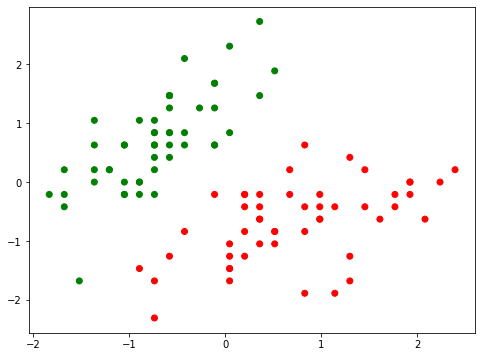

In [3]:
plt.figure(figsize=(8,6))
color = ['green' if c == 0 else 'red' for c in y]
plt.scatter(x[:,0], x[:,1], c=color)

**Using numpy. Well, I am stuck at how to get the support vectors LOL**

Here we try to get a good weight. Although it is not accurate.

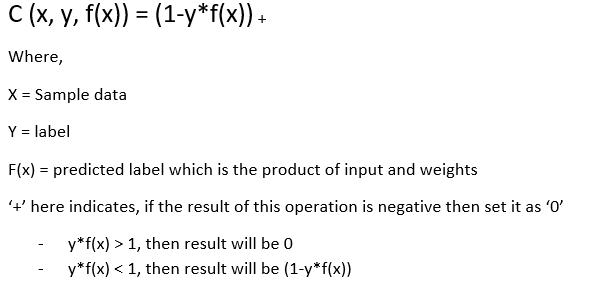
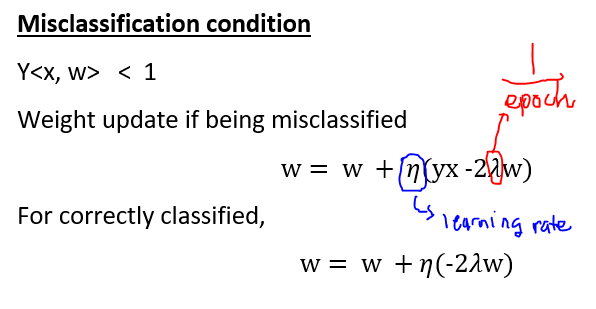

In [4]:
w = np.zeros(2)
# #initialize learning rate
l_rate = 0.001
# #epoch
epoch = 1000
# #output list
out = []


# #training svm
for e in range(epoch):
    for i, x_row in enumerate(x):
        # f(x) = w.x
        fx = np.dot(x_row, w)
        if (y[i]*fx < 1):
            w = w + l_rate * ((y[i]*x_row) - (2*(1/epoch)*w))
            
        else:
            w = w + l_rate * (-2*(1/epoch)*w)
           
            

print(f'Optimal weight: {w}')


Optimal weight: [ 2.1135808  -1.97420072]


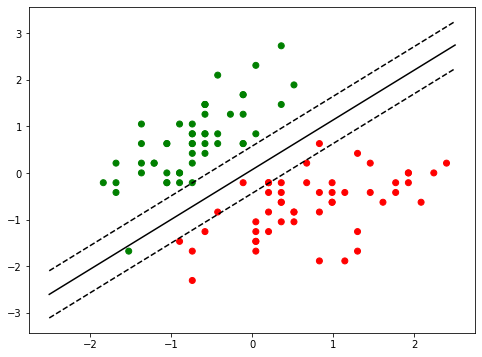

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c=color)

# get the separating hyperplane
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)

# intercept (should be using support vector data point, but here just try data at (1,1))
intercept = w[0]+w[1]
yy = a * xx - intercept / w[1]

# Create margin
margin = 1 / np.sqrt(np.sum(np.array([w]) ** 2))
yy_d = yy - np.sqrt(1 + a ** 2) * margin
yy_u = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_u, 'k--')
plt.plot(xx, yy_d, 'k--')

**SVM using Sci-kit Learn**

In [6]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(x, y)

SVC(C=10000000000.0, kernel='linear')

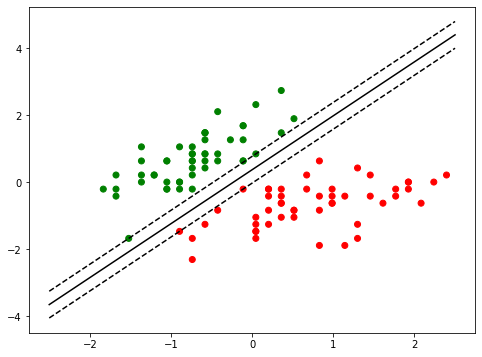

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c=color)

# Create the hyperplane
w_model = model.coef_[0]
a = -w_model[0] / w_model[1]
xx_model = np.linspace(-2.5, 2.5)
yy_model = a * xx - (model.intercept_[0]) / w_model[1]

# Create margin
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy_model - np.sqrt(1 + a ** 2) * margin
yy_up = yy_model + np.sqrt(1 + a ** 2) * margin

# Plot the hyperplane & margin
plt.plot(xx_model, yy_up, 'k--')
plt.plot(xx_model, yy_model, 'k-')
plt.plot(xx_model, yy_down, 'k--')


In [8]:
model.intercept_[0]

0.9276253650167997

In [9]:
model.coef_

array([[ 4.03363363, -2.50774331]])